# Creating Linear Gaussian Bayesian Networks

Similar to defining a Discrete Bayesian Network (BN), defining a Linear Gaussian BN also involves specifying the network structure and its parameterization.

There are a few ways to define a Linear Gaussian BN in pgmpy:
1. Load an example model from bnlearn repository (https://www.bnlearn.com/bnrepository/).
2. Define the network manually.
3. Generate a random network.

## 1. Load an Example Model

pgmpy provides a method `pgmpy.utils.get_example_model` to quickly load any model from the bnlearn repository: https://www.bnlearn.com/bnrepository/

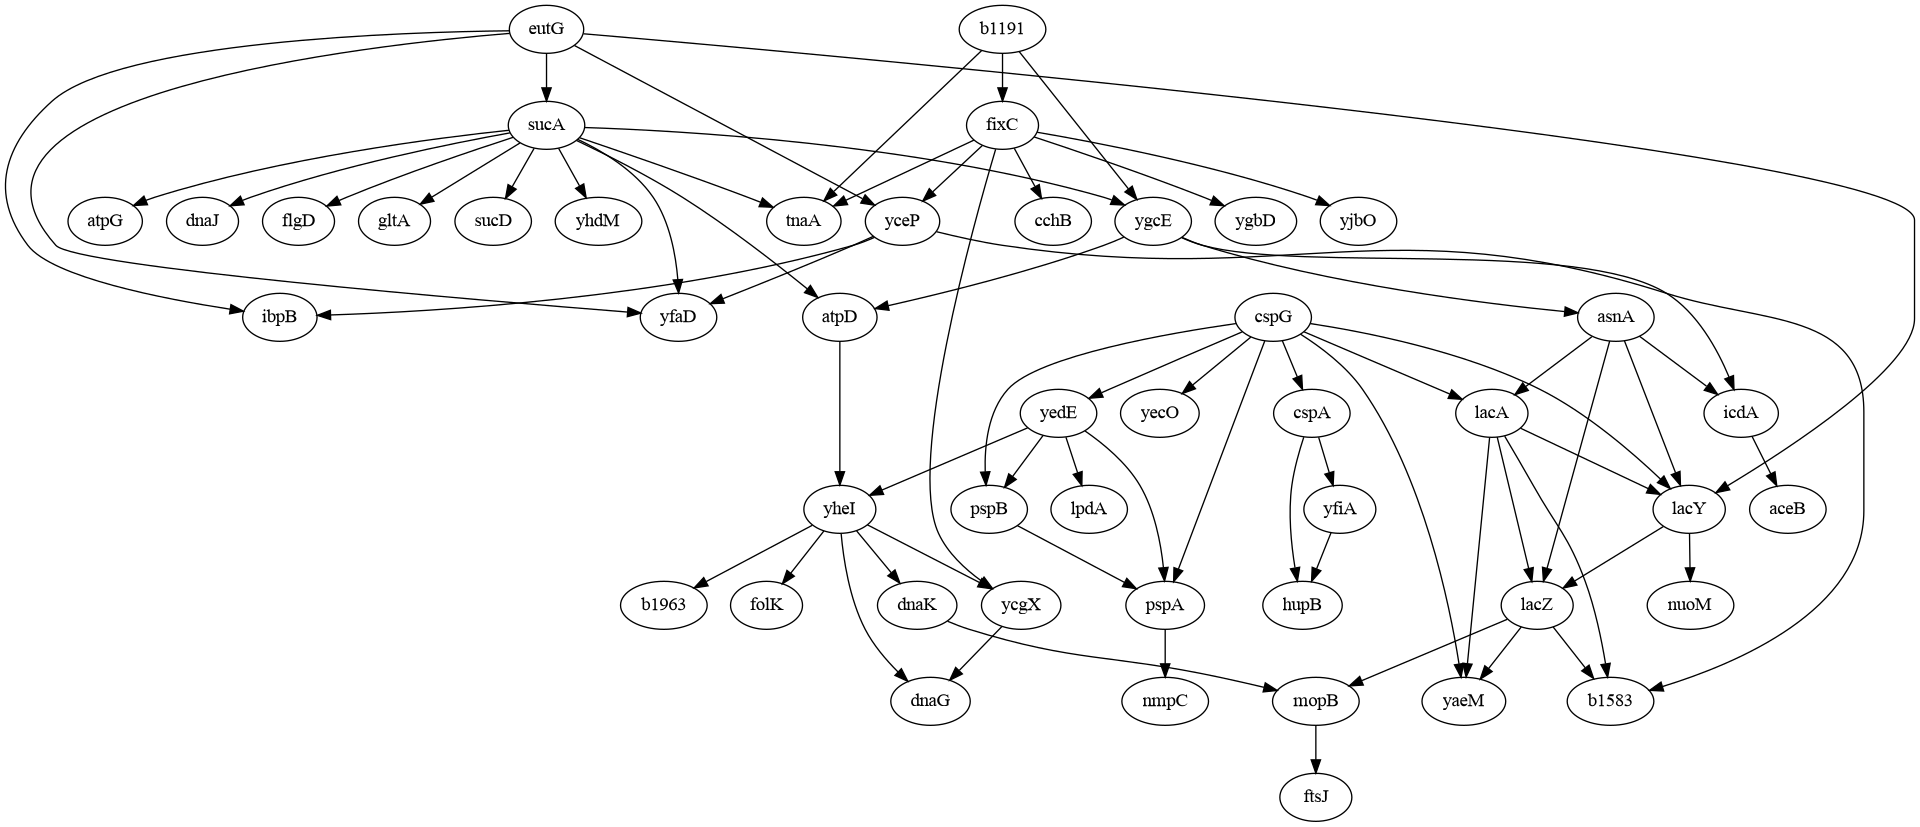

In [1]:
# Imports
from IPython.display import Image
from pgmpy.utils import get_example_model

# Load the model
ecoli_model = get_example_model('ecoli70')

# Visualize the network
viz = ecoli_model.to_graphviz()
viz.draw('ecoli.png', prog='dot')
Image('ecoli.png')

In [2]:
import pprint

# Access attributes of the model
nodes = ecoli_model.nodes()
edges = ecoli_model.edges()
cpds = ecoli_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"A subset of CPDs in the model: ")
pprint.pp(cpds[:10])

Nodes in the model: ['asnA', 'icdA', 'lacA', 'lacY', 'lacZ', 'atpD', 'yheI', 'b1191', 'fixC', 'tnaA', 'ygcE', 'cspA', 'hupB', 'yfiA', 'cspG', 'pspA', 'pspB', 'yaeM', 'yecO', 'yedE', 'dnaK', 'mopB', 'eutG', 'ibpB', 'sucA', 'yceP', 'yfaD', 'cchB', 'ycgX', 'ygbD', 'yjbO', 'aceB', 'b1583', 'nuoM', 'ftsJ', 'nmpC', 'atpG', 'dnaJ', 'flgD', 'gltA', 'sucD', 'yhdM', 'dnaG', 'lpdA', 'b1963', 'folK'] 

Edges in the model: [('asnA', 'icdA'), ('asnA', 'lacA'), ('asnA', 'lacY'), ('asnA', 'lacZ'), ('icdA', 'aceB'), ('lacA', 'b1583'), ('lacA', 'lacY'), ('lacA', 'lacZ'), ('lacA', 'yaeM'), ('lacY', 'lacZ'), ('lacY', 'nuoM'), ('lacZ', 'b1583'), ('lacZ', 'mopB'), ('lacZ', 'yaeM'), ('atpD', 'yheI'), ('yheI', 'b1963'), ('yheI', 'dnaG'), ('yheI', 'dnaK'), ('yheI', 'folK'), ('yheI', 'ycgX'), ('b1191', 'fixC'), ('b1191', 'tnaA'), ('b1191', 'ygcE'), ('fixC', 'cchB'), ('fixC', 'tnaA'), ('fixC', 'yceP'), ('fixC', 'ycgX'), ('fixC', 'ygbD'), ('fixC', 'yjbO'), ('ygcE', 'asnA'), ('ygcE', 'atpD'), ('ygcE', 'icdA'), ('c

## 2. Defining the Model Manually
Defining a network in pgmpy involves two steps:
1. Define the network structure
2. Define the parameterization, i.e. Linear Gaussian CPDs.

And lastly, CPDs can be associated with the network. Taking an example of the Cancer network from the bnlearn repository as shown below.

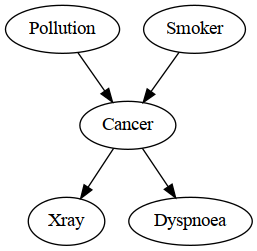

In [3]:
Image("images/cancer.png")

In [4]:
from pgmpy.models import LinearGaussianBayesianNetwork
from pgmpy.factors.continuous import LinearGaussianCPD

# Step 1: Define the network structure.
cancer_model = LinearGaussianBayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

# Step 2: Define the CPDs.
cpd_poll = LinearGaussianCPD(variable="Pollution", evidence_mean=[0], evidence_variance=1, evidence=[])
cpd_smoke = LinearGaussianCPD(variable="Smoker", evidence_mean=[0], evidence_variance=1, evidence=[])
cpd_cancer = LinearGaussianCPD(
    variable="Cancer",
    evidence_mean=[0, 0.2, 0.4],
    evidence_variance=1,
    evidence=["Pollution", "Smoker"],
)
cpd_xray = LinearGaussianCPD(
    variable="Xray",
    evidence_mean=[0, 0.3],
    evidence_variance=1,
    evidence=["Cancer"],
)
cpd_dysp = LinearGaussianCPD(
    variable="Dyspnoea",
    evidence_mean=[0, 0.5],
    evidence_variance=1,
    evidence=["Cancer"],
)

# Step 3: Add the CPDs to the model.
cancer_model.add_cpds(cpd_poll, cpd_smoke, cpd_cancer, cpd_xray, cpd_dysp)

# Step 4: Check if the model is correctly defined.
cancer_model.check_model()

True

## 3. Generating a Random Model
pgmpy offers methods to:
1. Generate a completely random network
2. Given a network structure, generate random CPDs.

### Generate a completely random model

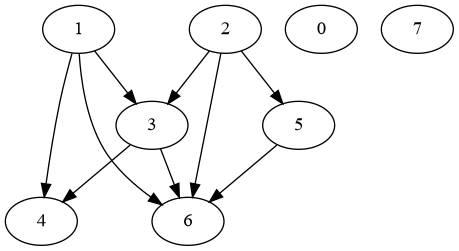

In [5]:
from pgmpy.models import LinearGaussianBayesianNetwork

random_model = LinearGaussianBayesianNetwork.get_random(n_nodes=8, edge_prob=0.4, latents=True)

# Visualize the network
viz = random_model.to_graphviz()
viz.draw('random.png', prog='dot')
Image('random.png')

In [6]:
import pprint

# Access attributes of the model
nodes = random_model.nodes()
edges = random_model.edges()
cpds = random_model.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: [1, 3, 4, 6, 2, 5, 0, 7] 

Edges in the model: [(1, 3), (1, 4), (1, 6), (3, 4), (3, 6), (2, 3), (2, 5), (2, 6), (5, 6)] 

CPDs in the model: 
[<LinearGaussianCPD: P(1) = N(-2.21; 0.827) at 0x7f3343d135c0,
 <LinearGaussianCPD: P(3 | 1, 2) = N(0.175*1 + 0.239*2 + -0.613; 1.104) at 0x7f3343de9220,
 <LinearGaussianCPD: P(4 | 1, 3) = N(-1.934*1 + -0.129*3 + 2.26; 0.161) at 0x7f3342fa41d0,
 <LinearGaussianCPD: P(6 | 1, 2, 3, 5) = N(-0.155*1 + -1.011*2 + 1.768*3 + 1.358*5 + 0.152; 1.428) at 0x7f334210bd70,
 <LinearGaussianCPD: P(2) = N(0.627; 0.696) at 0x7f3342109ca0,
 <LinearGaussianCPD: P(5 | 2) = N(2.181*2 + 0.738; 1.892) at 0x7f3342109370,
 <LinearGaussianCPD: P(0) = N(-0.218; 1.09) at 0x7f334210a6c0,
 <LinearGaussianCPD: P(7) = N(0.815; 2.665) at 0x7f334210b770]


### Generate random CPDs for a given network structure

In [7]:
# Taking the example of the cancer model. 

cancer_random = LinearGaussianBayesianNetwork(
    [
        ("Pollution", "Cancer"),
        ("Smoker", "Cancer"),
        ("Cancer", "Xray"),
        ("Cancer", "Dyspnoea"),
    ]
)

cancer_random.get_random_cpds(inplace=True)

# Access attributes of the model
nodes = cancer_random.nodes()
edges = cancer_random.edges()
cpds = cancer_random.get_cpds()

print(f"Nodes in the model: {nodes} \n")
print(f"Edges in the model: {edges} \n")
print(f"CPDs in the model: ")
pprint.pp(cpds)

Nodes in the model: ['Pollution', 'Cancer', 'Smoker', 'Xray', 'Dyspnoea'] 

Edges in the model: [('Pollution', 'Cancer'), ('Cancer', 'Xray'), ('Cancer', 'Dyspnoea'), ('Smoker', 'Cancer')] 

CPDs in the model: 
[<LinearGaussianCPD: P(Pollution) = N(-1.376; 0.535) at 0x7f33421092e0,
 <LinearGaussianCPD: P(Cancer | Pollution, Smoker) = N(0.962*Pollution + -1.622*Smoker + -2.056; 0.313) at 0x7f345df37410,
 <LinearGaussianCPD: P(Smoker) = N(1.722; 0.653) at 0x7f345df364e0,
 <LinearGaussianCPD: P(Xray | Cancer) = N(-1.351*Cancer + 0.498; 1.734) at 0x7f345df35cd0,
 <LinearGaussianCPD: P(Dyspnoea | Cancer) = N(-0.058*Cancer + -0.241; 2.068) at 0x7f345df36870]
